# ベイズ推定

## ベルヌーイ分布のベイズ推定  
具体例 コイントスの確率推定

In [1]:
import numpy as np
import sympy
import matplotlib.pyplot as plt
from scipy.special import gamma
%matplotlib inline

In [2]:
mu = sympy.Symbol("u")
def posterior(D, prior):
    global mu
    # 尤度
    likelihood = mu**D[0] * (1-mu)**(D[1]-D[0])
    # 事後確率
    post = prior * likelihood
    # 正規化
    post /= sympy.integrate(post, (mu, 0,1))
    return post

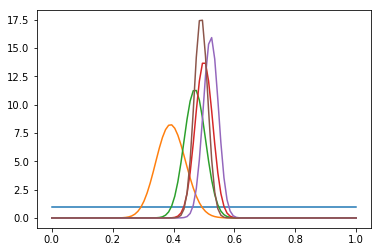

In [3]:
fig = plt.figure(0)
# 事前分布
prior = 1

# 分布のプロット
x = np.linspace(0, 1, 100)
y = [1 for j in x]
plt.plot(x, y)

# 分布の更新 (n: 更新回数)
# 0<=th_min<=th_max<=100
n = 5
th_min = 30
th_max = 60
for i in range(n):
    # サンプリング（コインの表の確率[%]の範囲）
    data = np.random.randint(th_min,th_max)
    # 事後分布の計算
    post = posterior((data, 100), prior)

    # 事後分布のプロット
    y = [post.subs(mu, j) for j in x]
    plt.plot(x, y)
    prior = post

---

## １変数ガウスのベイズ推定

In [4]:
# ガウス分布を作成
def makeGaussian(mu, sig):
    def gaussian(x):
        return np.exp(-(x - mu)**2 / (2*sig)) / np.sqrt(2*np.pi*sig)
    return gaussian

# ガンマ分布を作成
def makeGammaDist(a, b):
    def gammaDist(x):
        return b**a*x**(a-1)*np.exp(-b*x) / gamma(a)
    return gammaDist


データの分布のパラメータ（正規分布）  

In [5]:
mu_D, sig_D, N = 2, 9, 10000

### 平均$\mu$未知， 分散$\sigma^2$既知の正規分布の$\mu$についてのベイズ推定

平均の事前分布を正規分布とする．  
データの確率モデルが正規分布とする時，平均値の共役事前分布は正規分布となる

mu -2.4253601597175645 ==> 1.76564858816 <=> 2
sig 14.64891432961419 ==> 0.1778150794265973


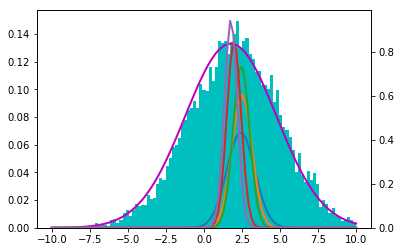

In [6]:
# 見本のサンプル
x = np.linspace(-10, 10, 100)
Xm = np.random.normal(mu_D, sig_D**0.5, N)
fig, ax1 = plt.subplots()
ax1.hist(Xm, bins=x, normed=True, color="c")  # 見本サンプルのヒストグラム
ax2 = ax1.twinx()

# 事前分布のパラメータを更新
mu_init, sig_init = np.random.uniform(-5, 5), np.random.uniform(1, 5)**2
Ns, n = 10, 5  # サンプル数

# 事後分布計算 → 事前分布の更新
mu_prior, sig_prior = mu_init, sig_init
for i in range(n):
    # サンプリング
    Xs = np.random.normal(mu_D, sig_D**0.5, Ns)
    
    # 事後分布計算
    mu_post = sig_D*mu_prior/(Ns*sig_prior+sig_D) + Ns*sig_prior*Xs.mean()/(Ns*sig_prior+sig_D)
    sig_post = (1/sig_prior + Ns/sig_D)**-1
    dist_post = makeGaussian(mu_post, sig_post)
    
    # 事後分布をプロット
    ax2.plot(x, dist_post(x), linewidth=2)
    
    # 事前分布のパラメータを更新
    mu_prior = mu_post
    sig_prior = sig_post
   
_=ax2.set_ylim(0, ) 

# 推定分布
ax1.plot(x, makeGaussian(mu_post, sig_D)(x), "m", linewidth=2)
print("mu", mu_init,  "==>", mu_post, "<=>", mu_D)
print("sig", sig_init,  "==>", sig_post)

### 平均$\mu$既知， 分散$\sigma^2$未知の正規分布の$\mu$についてのベイズ推定  
分散の事前分布をガンマ分布とする  
データの確率モデルが正規分布とする時，分散値の共役事前分布はガンマ分布となる

sig: 6.70521503265 <==> 9


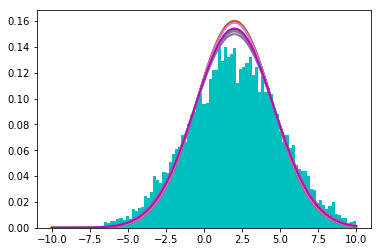

In [7]:
# 見本のサンプル
x = np.linspace(-10, 10, 100)
Xm = np.random.normal(mu_D, sig_D**0.5, N)
fig, ax1 = plt.subplots()
ax1.hist(Xm, bins=x, normed=True, color="c")  # 見本サンプルのヒストグラム

# 事前分布のパラメータ
a_init, b_init = 0, 0  # 無情報事前分布のパラメータ
Ns, n = 10, 10  # サンプル数 and 繰り返し回数

# 事後分布計算 → 事前分布の更新
a_prior, b_prior = a_init, b_init
for i in range(n):
    # サンプリング
    Xs = np.random.normal(mu_D, sig_D**0.5, Ns)
    
    # 事後分布計算
    a_post = a_prior + Ns/2
    b_post = b_prior + Ns*Xs.var()/2;
    dist_post = makeGammaDist(a_post, b_post)
    
    ax1.plot(x, makeGaussian(mu_D, b_post/a_post)(x), linewidth=2)
    
    # 事前分布のパラメータを更新
    a_prior = a_post
    b_prior = b_post
    
_=ax2.set_ylim(0, )

ax1.plot(x, makeGaussian(mu_D, b_post/a_post)(x), "m", linewidth=2)
print("sig:", b_post/a_post, "<==>", sig_D)

### 平均$\mu$未知， 分散$\sigma^2$未知の正規分布の$\mu$についてのベイズ推定
平均の事前分布を正規分布，分散の事前分布をガンマ分布とする  
データの確率モデルが正規分布とする時，平均値と分散値の共役事前分布は正規-ガンマ分布となる

2 9
2.12778538652 8.15017611209


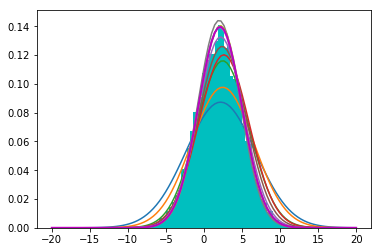

In [8]:
# 見本のサンプル
x = np.linspace(-20, 20, 100)
Xs = np.random.normal(mu_D, sig_D**0.5, N)
fig, ax1 = plt.subplots()
ax1.hist(Xs, bins=x, normed=True, color="c")  # 見本サンプルのヒストグラム

# 事前分布のパラメータ
a_init, b_init, mu_init, l_init = 0,0,0,0
Ns, n = 10, 10   # サンプル数 and 繰り返し回数

a_prior, b_prior, mu_prior, l_prior = a_init, b_init, mu_init, l_init
Xs = np.zeros(0)
for i in range(n):
    Xs = np.random.normal(mu_D, sig_D**0.5, Ns)
    
    a_post = a_prior + Ns/2
    b_post =  b_prior + ((Xs**2).sum() - Ns*(mu_prior**2)) / 2
    mu_post = (Xs.sum() + l_prior*mu_prior) / (Ns + l_prior)
    l_post = Ns + l_prior

    #plt.subplot(122)
    model_dist = makeGaussian(mu_post, b_post/a_post)
    plt.plot(np.linspace(-20, 20, 100), model_dist(np.linspace(-20, 20, 100)), )

    a_prior = a_post
    b_prior = b_post
    mu_prior = mu_post
    l_prior = l_post
    
plt.plot(x, makeGaussian(mu_post, b_post/a_post)(x), "m", linewidth=2) 
print(mu_D, sig_D)
print(mu_post, b_post/a_post)